In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t_1hot = np.zeros((len(t_indices),N))
    for i in range(len(t_indices)):
        t_1hot[i][t_indices[i]] = 1.0
    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [5]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    Nsamples_test = int(testFraction*X.shape[0])
    indices = np.random.permutation(X.shape[0])
    test_idx, training_idx = indices[:Nsamples_test], indices[Nsamples_test:]
    X_train, t_train,X_test,t_test = X[training_idx],t[training_idx],X[test_idx],t[test_idx]
    
    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [7]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    mean = np.mean(X_train,axis=0)
    std  = np.std(X_train,axis=0)
    X_train_normalized = (X_train-mean)/std
    X_test_normalized = (X_test-mean)/std
    
    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [9]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    y = 1/(1+np.exp(-x))
    ### WRITE YOUR CODE HERE - 1 MARKS

    return y

In [10]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [11]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    y = np.exp(x)/np.sum(np.exp(x))
    ### WRITE YOUR CODE HERE - 1 MARKS

    return y

In [12]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [13]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = x*(1-x)

    return y

In [14]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''

        ### WRITE YOUR CODE HERE - 2 MARKS
        self.weights1 = np.random.randn(self.nh,self.ni+1)
        self.weights2 = np.random.randn(self.no,self.nh+1)

    
    def predict(self, x):
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x1,y1,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
        x = np.zeros((len(x1),1))
        y = np.zeros((len(y1),1))
        for i in range(len(x1)):
            x[i][0]=x1[i]
        for i in range(len(y1)):
            y[i][0]=y1[i]
        x = np.insert(x,0,1,axis=0)# inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        del_weights2 = - (y-v2).dot(v1.T)
        w2 = self.weights2
        w2 = w2[:,1:]
        del_weights1 = (((w2.T).dot(- y + v2))*sigmoid_derivative(v1[1:,:])).dot(x.T)
        self.weights2 -= eta*del_weights2
        self.weights1 -= eta*del_weights1


    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''

        ### WRITE YOUR CODE HERE - 5 MARKS
        E1,e1 = [],[]
        decay = (eta*(1.0))/epochs
        for i in range(epochs):
            E=0
            for j in range(X.shape[0]):
                x = np.zeros((len(X[j]),1))
                for k in range(len(X[j])):
                    x[k][0]=X[j][k]
                y = self.predict(x)
                self.backprop(x,t[j].T,eta)
                if(i%20==0):
                    E += -t[j].dot(np.log10(y))
            #eta *= (1. / (1. + decay * i))
            if(i%20==0):
                print(E)
                E1.append(E)
                e1.append(i)
        return E1,e1

        
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''

        ### WRITE YOUR CODE HERE - 1 MARKS
        y = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            y[i][0]=np.argmax(self.predict(x[i].T))

        return y

In [15]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''
    ### WRITE YOUR CODE HERE - 3 MARKS
    CM = np.zeros((t.shape[1],t.shape[1]))
    for i in range(y.shape[0]):
        j = np.argmax(t[i])
        CM[j][int(y[i])]+=1

    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

(150, 4)
(150,)
[68.2473479]
[36.74932271]
[30.78526514]
[27.7285605]
[25.63272431]
[24.04042308]
[22.74502486]
[21.63663388]
[20.65382681]
[19.76130211]
[18.93825159]
[18.17195324]
[17.45414863]
[16.77901013]
[16.14204491]
[15.53954327]
[14.96832483]
[14.42563196]
[13.90908416]
[13.41664997]
[12.94661801]
[12.49756205]
[12.06830115]
[11.65785746]
[11.26541449]
[10.89027793]
[10.53184077]
[10.18955334]
[9.86289904]
[9.55137564]
[9.25448202]
[8.97170983]
[8.70253926]
[8.44643828]
[8.2028642]
[7.97126706]
[7.75109378]
[7.54179286]
[7.34281879]
[7.15363623]
[6.97372355]
[6.80257572]
[6.63970659]
[6.48465047]
[6.33696319]
[6.19622268]
[6.0620291]
[5.93400468]
[5.81179327]
[5.69505975]
[5.58348918]
[5.476786]
[5.37467306]
[5.27689068]
[5.18319562]
[5.09336019]
[5.00717124]
[4.92442927]
[4.84494752]
[4.76855119]
[4.69507656]
[4.62437032]
[4.55628881]
[4.49069736]
[4.4274697]
[4.36648736]
[4.30763914]
[4.25082058]
[4.19593355]
[4.14288577]
[4.09159041]
[4.04196577]
[3.99393487]
[3.94742517]
[

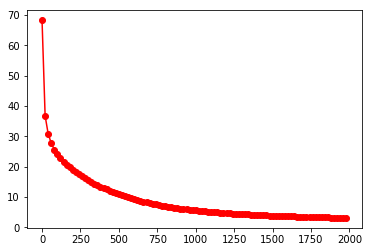

In [17]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    nh = 4
    eta = 0.001
    epochs = 2000
    X,t1 = loadIrisData()
    t1 = one_hot_encoding(t1,3)
    X_train, t_train, X_test, t_test = splitData(X,t1,0.2)
    X_train,X_test = normalizeX(X_train,X_test)
    NN = NeuralNetwork(X_train.shape[1],nh,3)
    NN.init_weights()
    loss,eps = NN.fit(X_train,t_train,eta,epochs)
    y = NN.predict_label(X_test)
    CM = getCM(y,t_test)
    print(CM)
    plt.plot(eps,loss,'ro-')
    
if __name__=="__main__":
    experiment()